# 幸せは波に乗ってやって来る？
1254810794　桃井優


このレポートでは幸せになるには何が大切なのかを分析していきました。
まずは、幸福度のスコアに最も相関があるものについて表にしてみたので見ていきましょう。

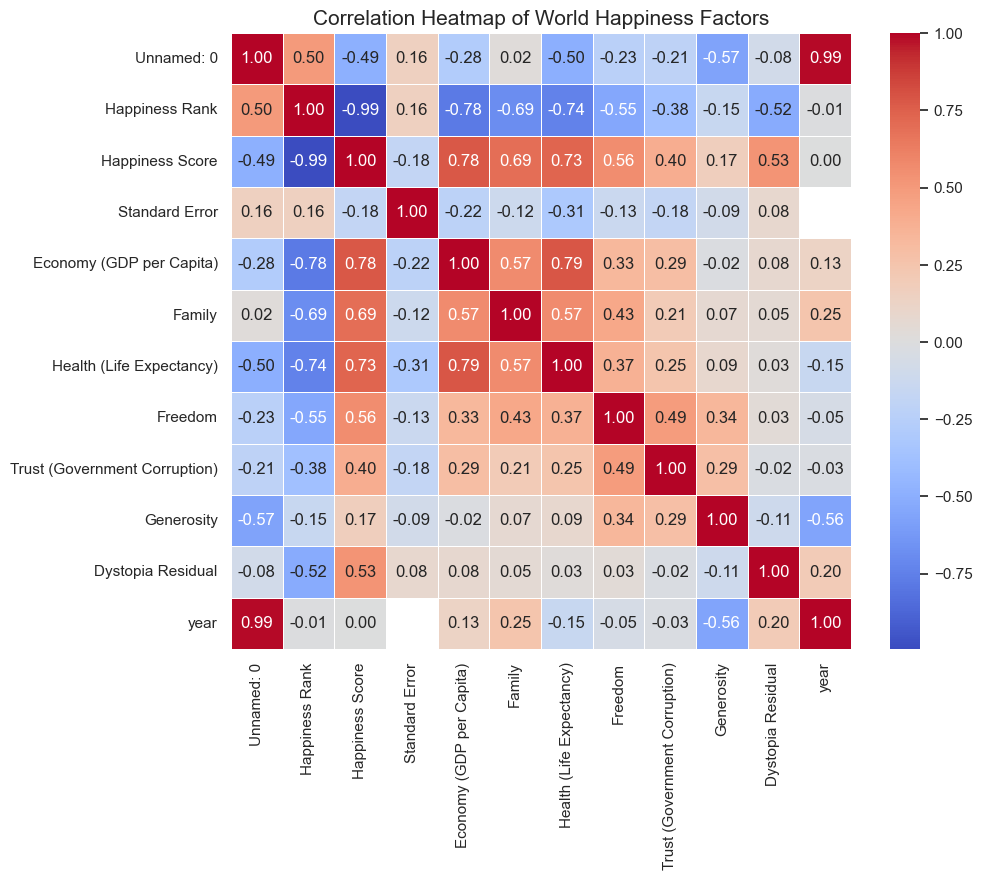

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# データの読み込み
df = pd.read_csv('world_happiness_report.csv')

# 数値データのみを抽出して相関行列を計算
# (Country や Region などの文字列カラムを除外します)
corr_matrix = df.select_dtypes(include=['number']).corr()

# ヒートマップの描画設定
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# タイトルの設定
plt.title('Correlation Heatmap of World Happiness Factors', fontsize=15)
plt.show()



これを見ると、Happiness Scoreの行で数値が高いのはEconomy,Family,Health,の３つになりました。
この表では、どの地域に幸せ者が多いのかわからないためマップにして探してみます。


In [20]:
import pandas as pd
import folium
import requests

# 1. データの読み込み
df = pd.read_csv('world_happiness_report.csv')

# 2. 国名の表記修正（アメリカ）
df['Country'] = df['Country'].replace({'United States': 'United States of America'})

# 3. 2015年のデータを選択
target_year = 2015
target_df = df[df['year'] == target_year].copy()

# 4. グリーンランドのデータを追加（デンマークの値をコピー）
if 'Denmark' in target_df['Country'].values:
    denmark_score = target_df[target_df['Country'] == 'Denmark']['Happiness Score'].values[0]
    # グリーンランドという名前で新しい行を作成
    greenland_row = pd.DataFrame({'Country': ['Greenland'], 'Happiness Score': [denmark_score]})
    target_df = pd.concat([target_df, greenland_row], ignore_index=True)

# 5. 地図データの取得
url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json"
world_geo = requests.get(url).json()

# 6. 地図の作成
m = folium.Map(location=[40, -40], zoom_start=2) # グリーンランドが見えやすい位置に調整

folium.Choropleth(
    geo_data=world_geo,
    name="choropleth",
    data=target_df,
    columns=["Country", "Happiness Score"],
    key_on="feature.properties.name",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color="gray",
    legend_name=f"Happiness Score ({target_year})"
).add_to(m)

# 7. 保存
m.save("happiness_map_v3.html")


![alt text](<happy map.png>)

結果としては、アメリカ大陸はかなり幸せを感じている人が多く私たちが住んでいるアジアや、ヨーロッパも幸せを感じている人は多いもののアメリカと比べると少し低くなっています。アフリカ大陸の地域では、平均して低くHealthやEconomyなどの要因が強くかかわっているのが考えられます。この地図を見ると幸福度の高い地域では海に面している地域が多いよう見えます。

そのため次は、本当に海は幸福度に関係するのかを調べます。

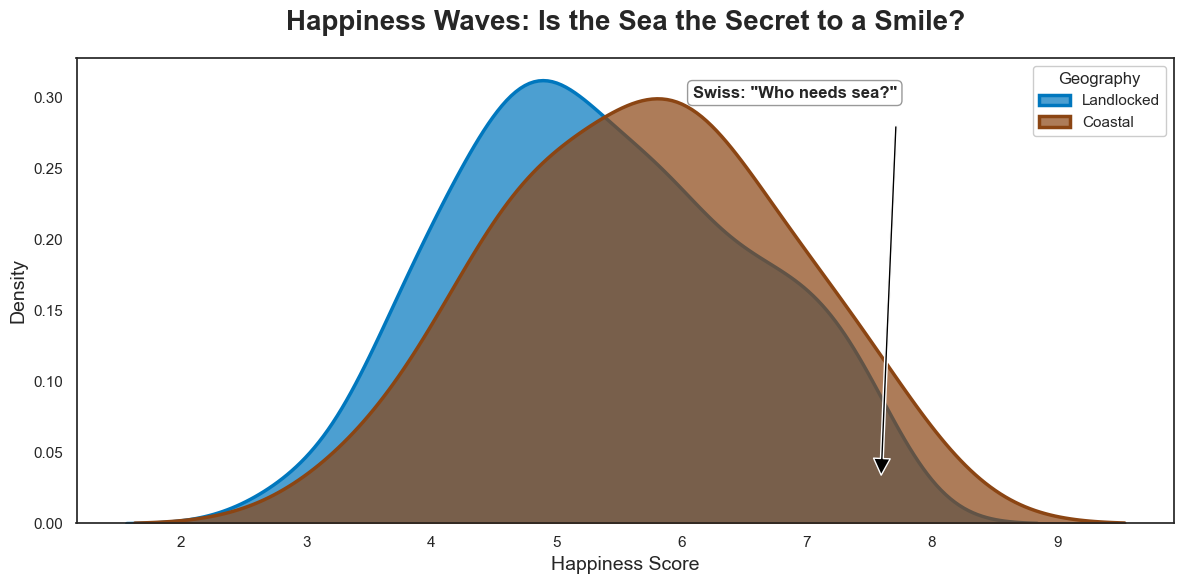

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. データ準備
df = pd.read_csv('world_happiness_report.csv')
df_2015 = df[df['year'] == 2015].copy()

# 2. 内陸国の定義
landlocked = ['Switzerland', 'Austria', 'Czech Republic', 'Slovakia', 'Hungary', 
              'Luxembourg', 'Kazakhstan', 'Uzbekistan', 'Mongolia', 'Ethiopia', 
              'Bolivia', 'Paraguay', 'Afghanistan', 'Nepal', 'Zambia']

df_2015['Status'] = df_2015['Country'].apply(
    lambda x: '⚓ Coastal (Sea)' if x not in landlocked else '⛰️ Landlocked (No Sea)'
)

# 3. グラフ作成
plt.figure(figsize=(12, 6))
sns.set_theme(style="white") # 背景を白基調に

pal = {"⚓ Coastal (Sea)": "#0077be", "⛰️ Landlocked (No Sea)": "#8b4513"}

g = sns.kdeplot(
    data=df_2015, x="Happiness Score", hue="Status",
    fill=True, common_norm=False, palette=pal,
    alpha=0.7, linewidth=2.5
)

# 4. デザイン調整
plt.title('Happiness Waves: Is the Sea the Secret to a Smile?', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Happiness Score', fontsize=14)
plt.ylabel('Density', fontsize=14)

# 【修正ポイント】凡例の背景を白にし、枠線を付ける
plt.legend(title="Geography", labels=['Landlocked', 'Coastal'], 
           loc='upper right', frameon=True, facecolor='white', framealpha=1)

# スイスへの注釈
top_score = df_2015[df_2015['Country'] == 'Switzerland']['Happiness Score'].values[0]
plt.annotate('Swiss: "Who needs sea?"', 
             xy=(top_score, 0.02),
             xytext=(top_score - 1.5, 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05, width=2),
             fontsize=12, fontweight='bold', bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

グラフを見るとやはり沿岸の地域の幸福度は内陸の地域より若干高くなっています。しかし、スイスなどのように内陸国でも幸福度が高い地域はあるみたいですね。

## まとめ
今回、人間が幸福になるにはどの要素が必要かについて調べていきました。結果としては、財力、家族、健康の３つの要素が大切だということになりました。また、地理的観点からみると幸福度の高い地域は沿岸沿いの地域の方が多いという結果も出ました。海が関係することは予想していませんでした。海がなぜ幸福度にかかわるのか少し調べてみました。まず、海があるということは、他国との貿易がしやすいため国がにぎわいやすくなります。また、漁業資源などにも強く影響を与えていると考えました。
さらに海は健康にも影響を与えていると考えました。海を見ているとリラックスすることができ、気候も穏やかになるそうです。それらのことを考えると沿岸の地域は幸福度が高くなるのも必然なのだと感じました。